Try to fit $P(\log\;SSFR)$ distribution of galaxies using Gaussian Mixture Models

In [2]:
import numpy as np 
import sklearn.mixture as Mix
from scipy.stats import multivariate_normal as MNorm

import matplotlib.pyplot as plt
%matplotlib inline

#--- local --- 
import env
import catalogs as Cats

First lets import a catalog

In [6]:
jlt = Cats.Catalog()
logm, logsfr, w = jlt.Read('tinkergroup')

------  tinkergroup  ------
3  of  12344  galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.


Lets focus on a specific mass range $10^{10} - 10^{10.2}$

In [7]:
inmbin = np.where((logm > 10.) & (logm < 10.2))

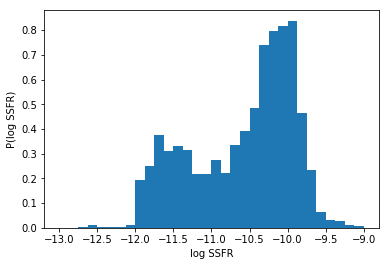

In [12]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(logsfr[inmbin] - logm[inmbin], range=[-13., -9.], bins=32, normed=True)
sub.set_xlabel('log SSFR')
sub.set_ylabel('P(log SSFR)')

Now lets Gaussian "mix" it up!

In [45]:
X = logsfr[inmbin] - logm[inmbin]
X = np.reshape(X, (-1,1))

3  components, BIC = 3273.69247198
2  components, BIC = 3250.69516057
1  components, BIC = 3752.76489513


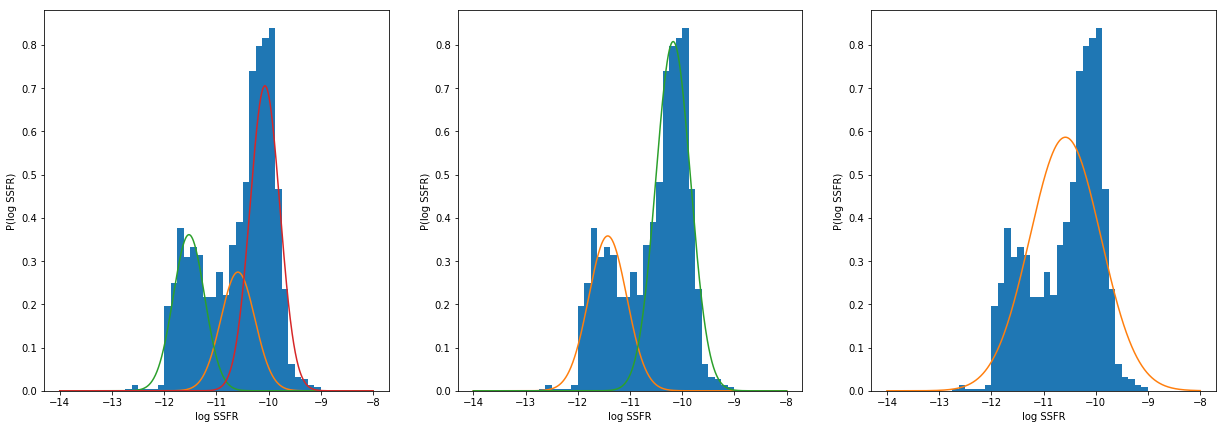

In [49]:
fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)

In [54]:
lowmbin = np.where((logm > 9.7) & (logm < 9.9) & (logsfr  > -14+logm) & (logsfr  < -8+logm))

In [55]:
X = logsfr[lowmbin] - logm[lowmbin]
X = np.reshape(X, (-1,1))

3  components, BIC = 3009.83169128
2  components, BIC = 2996.28584988
1  components, BIC = 3655.90772194


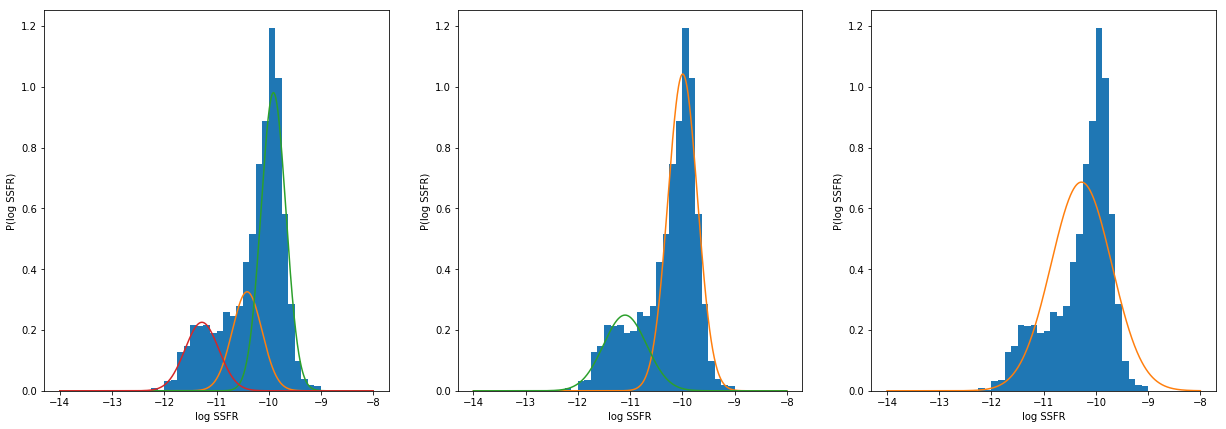

In [56]:
fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)

In [65]:
highmbin = np.where((logm > 11.2) & (logm < 11.4) & (logsfr  > -14+logm) & (logsfr  < -8+logm))
print len(highmbin[0])

320


In [66]:
X = logsfr[highmbin] - logm[highmbin]
X = np.reshape(X, (-1,1))

3  components, BIC = 445.388930459
2  components, BIC = 467.99146448
1  components, BIC = 648.630365136


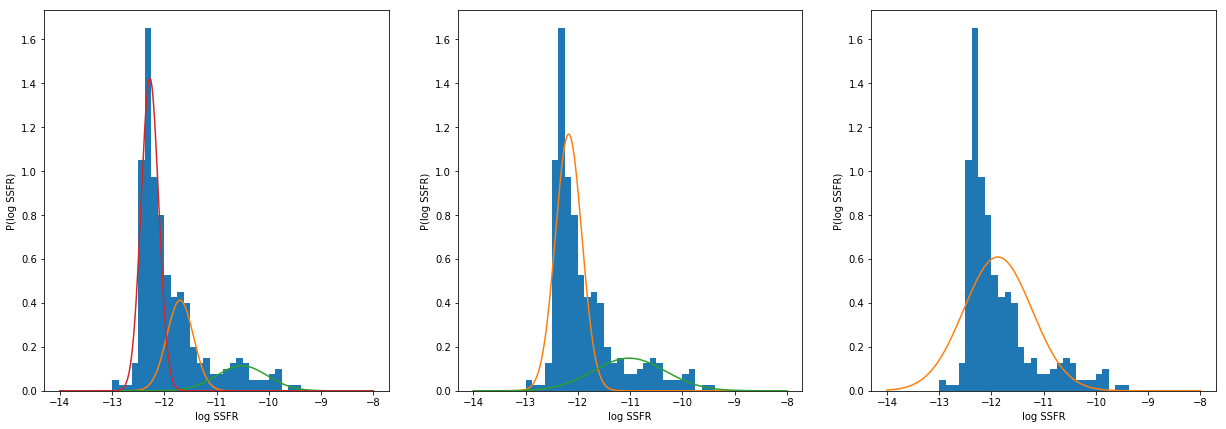

In [67]:
fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)